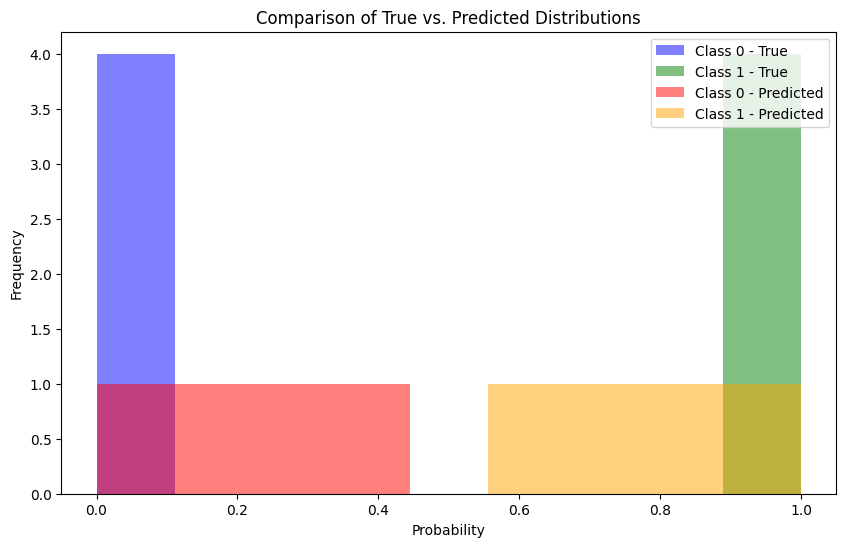

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Example true labels and predicted probabilities (after transformation)
y_true = np.array([0, 1, 0, 1, 0, 1, 0, 1])
y_pred = np.array([0.1, 0.9, 0.2, 0.8, 0.3, 0.7, 0.4, 0.6])

# Bin the predictions and true labels
bins = np.linspace(0, 1, 10)

# Plot the histograms
plt.figure(figsize=(10, 6))

# True distribution histogram
plt.hist(y_true[y_true == 0], bins=bins, alpha=0.5, label='Class 0 - True', color='blue')
plt.hist(y_true[y_true == 1], bins=bins, alpha=0.5, label='Class 1 - True', color='green')

# Predicted distribution histogram
plt.hist(y_pred[y_true == 0], bins=bins, alpha=0.5, label='Class 0 - Predicted', color='red')
plt.hist(y_pred[y_true == 1], bins=bins, alpha=0.5, label='Class 1 - Predicted', color='orange')

plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.title('Comparison of True vs. Predicted Distributions')
plt.legend(loc='upper right')
plt.show()

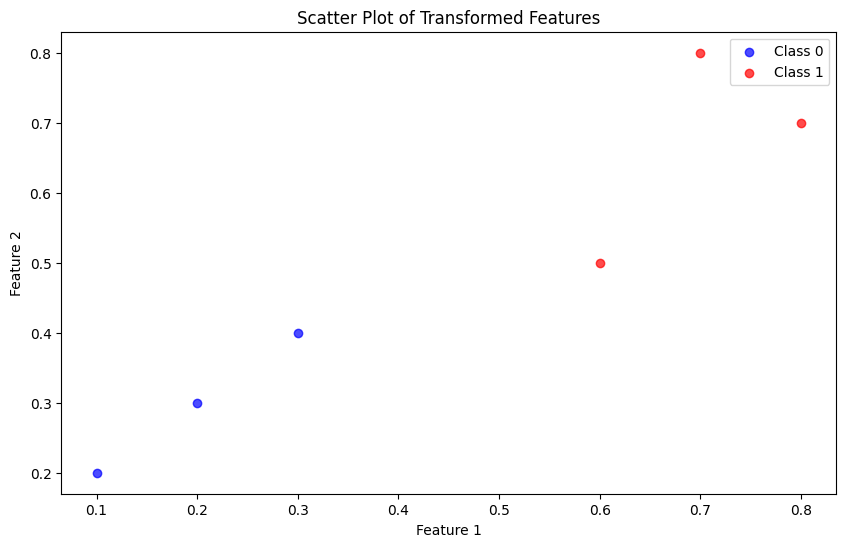

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Example transformed features and true labels
x_transformed = np.array([[0.1, 0.2], [0.8, 0.7], [0.2, 0.3], [0.7, 0.8], [0.3, 0.4], [0.6, 0.5]])
y_true = np.array([0, 1, 0, 1, 0, 1])

# Scatter plot
plt.figure(figsize=(10, 6))

# Plot class 0
plt.scatter(x_transformed[y_true == 0][:, 0], x_transformed[y_true == 0][:, 1], 
            color='blue', label='Class 0', alpha=0.7)

# Plot class 1
plt.scatter(x_transformed[y_true == 1][:, 0], x_transformed[y_true == 1][:, 1], 
            color='red', label='Class 1', alpha=0.7)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot of Transformed Features')
plt.legend()
plt.show()

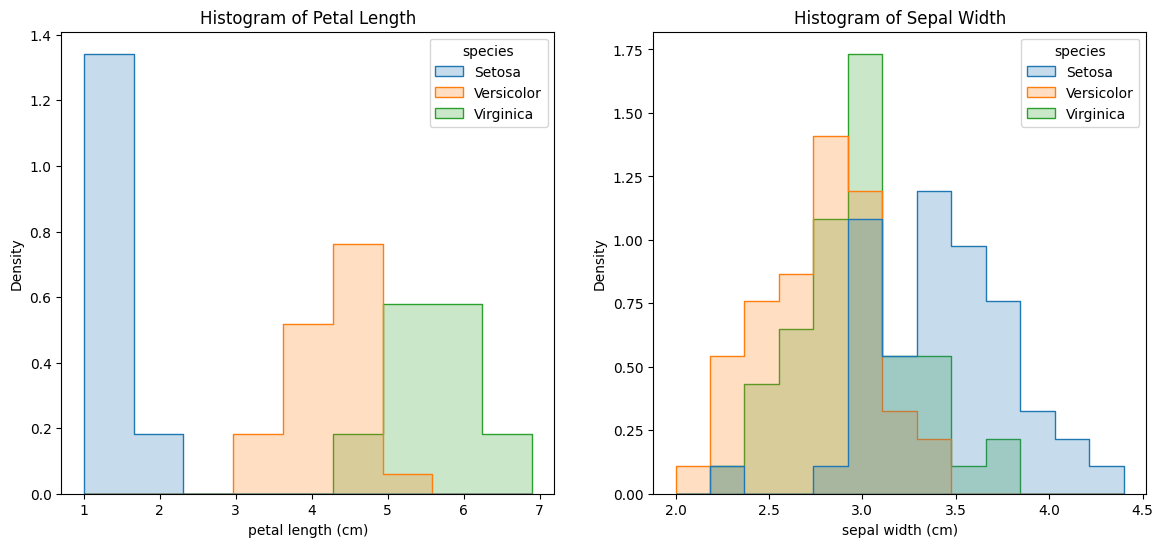

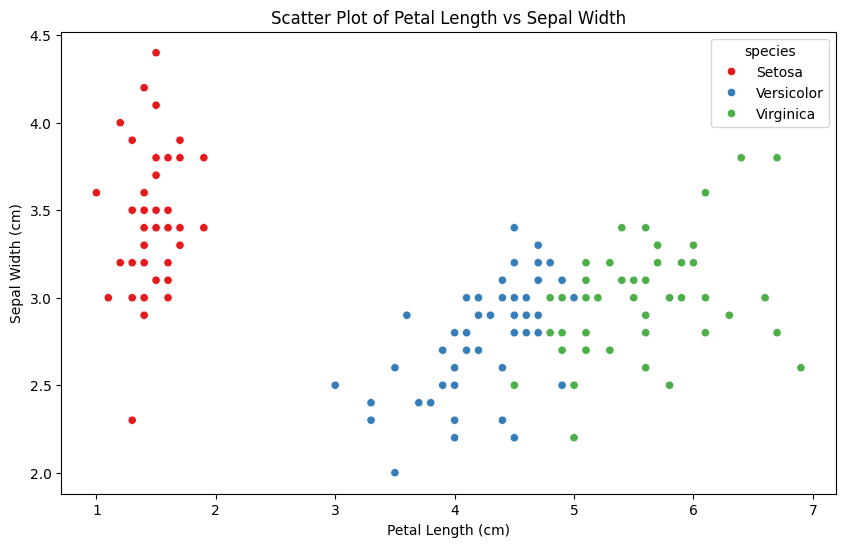

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
import pandas as pd

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Convert to a DataFrame for easier manipulation
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = y

# Map the species numbers to their names for better visualization
df['species'] = df['species'].map({0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'})

# Plotting histograms for two features: Petal Length and Sepal Width
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='petal length (cm)', hue='species', element='step', stat='density', common_norm=False)
plt.title('Histogram of Petal Length')

plt.subplot(1, 2, 2)
sns.histplot(data=df, x='sepal width (cm)', hue='species', element='step', stat='density', common_norm=False)
plt.title('Histogram of Sepal Width')

plt.show()

# Scatter plot using two features: Petal Length and Sepal Width
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='petal length (cm)', y='sepal width (cm)', hue='species', palette='Set1')
plt.title('Scatter Plot of Petal Length vs Sepal Width')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()

2. Example: Gaussian Assumption for KL Divergence Between Two Classes

Let’s assume that the features follow a Gaussian distribution for simplicity. The KL divergence between two univariate Gaussian distributions P and Q with means \mu_P, \mu_Q and variances \sigma_P^2, \sigma_Q^2 is given by:


D_{KL}(P || Q) = \log\left(\frac{\sigma_Q}{\sigma_P}\right) + \frac{\sigma_P^2 + (\mu_P - \mu_Q)^2}{2\sigma_Q^2} - \frac{1}{2}


In [8]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Convert to a DataFrame for easier manipulation
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = y

# Function to compute KL divergence between two Gaussian distributions
def kl_divergence_gaussian(mu_p, sigma_p, mu_q, sigma_q):
    return np.log(sigma_q / sigma_p) + (sigma_p**2 + (mu_p - mu_q)**2) / (2 * sigma_q**2) - 0.5

# Compute KL divergence for each feature between Setosa (0) and Versicolor (1)
kl_divergences = {}
for feature in iris.feature_names:
    mu_p, sigma_p = df[df['species'] == 0][feature].mean(), df[df['species'] == 0][feature].std()
    mu_q, sigma_q = df[df['species'] == 1][feature].mean(), df[df['species'] == 1][feature].std()
    
    kl_pq = kl_divergence_gaussian(mu_p, sigma_p, mu_q, sigma_q)
    kl_qp = kl_divergence_gaussian(mu_q, sigma_q, mu_p, sigma_p)
    
    kl_divergences[feature] = {'KL(Setosa || Versicolor)': kl_pq, 'KL(Versicolor || Setosa)': kl_qp}

# Display the results
kl_divergences_df = pd.DataFrame(kl_divergences).T
print(kl_divergences_df)

                   KL(Setosa || Versicolor)  KL(Versicolor || Setosa)
sepal length (cm)                  1.737700                  3.671267
sepal width (cm)                   2.239131                  1.538194
petal length (cm)                 18.290670                131.956804
petal width (cm)                  15.184657                 53.142751


To increase the KL divergence between the classes in the Iris dataset, we can manipulate the features or apply transformations that enhance the differences between the distributions of the classes. Here’s a step-by-step approach to achieve this:

1. Feature Transformation

	•	Scaling: Apply scaling or standardization to the features to give them equal importance.
	•	Polynomial Features: Introduce polynomial features to capture non-linear relationships that might increase the separation between the classes.
	•	Non-linear Transformations: Apply non-linear transformations like logarithms, exponentials, or custom functions to emphasize differences between the classes.
	•	Dimensionality Reduction: Techniques like Principal Component Analysis (PCA) can be used to project the data onto a space where the class separability is maximized.

2. Optimization-Based Approach

	•	Train a model to find a transformation that maximizes the KL divergence. For example, using a neural network or other models to learn a mapping of the input features to a new space where the KL divergence between classes is maximized.

Polynomial Features

Let’s try adding polynomial features and see if it increases the KL divergence. This method will introduce interactions between features, which might enhance the separation between the classes.

In [17]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import PolynomialFeatures

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Convert to a DataFrame for easier manipulation
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = y

# Filter out two classes for binary classification (Setosa vs Versicolor)
df_binary = df[df['species'] != 2].copy()

# Apply polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)
X_poly = poly.fit_transform(df_binary[iris.feature_names])

# Convert to DataFrame for analysis
df_poly = pd.DataFrame(X_poly, columns=poly.get_feature_names_out(iris.feature_names))
df_poly['species'] = df_binary['species'].values

# Function to compute KL divergence between two Gaussian distributions
def kl_divergence_gaussian(mu_p, sigma_p, mu_q, sigma_q):
    return np.log(sigma_q / sigma_p) + (sigma_p**2 + (mu_p - mu_q)**2) / (2 * sigma_q**2) - 0.5


# Compute KL divergence for each polynomial feature between Setosa (0) and Versicolor (1)
kl_divergences_poly = {}
for feature in df_poly.columns[:-1]:  # Exclude the species column
    mu_p, sigma_p = df_poly[df_poly['species'] == 0][feature].mean(), df_poly[df_poly['species'] == 0][feature].std()
    mu_q, sigma_q = df_poly[df_poly['species'] == 1][feature].mean(), df_poly[df_poly['species'] == 1][feature].std()
    
    kl_pq = kl_divergence_gaussian(mu_p, sigma_p, mu_q, sigma_q)
    kl_qp = kl_divergence_gaussian(mu_q, sigma_q, mu_p, sigma_p)
    
    kl_divergences_poly[feature] = {'KL(Setosa || Versicolor)': kl_pq, 'KL(Versicolor || Setosa)': kl_qp}

# Convert results to DataFrame
kl_divergences_poly_df = pd.DataFrame(kl_divergences_poly).T
kl_divergences_poly_df_sorted = kl_divergences_poly_df.sort_values(by='KL(Setosa || Versicolor)', ascending=False)

# Display the top features with the highest KL divergence
print("Top Features by KL Divergence (Polynomial)")
print(kl_divergences_poly_df_sorted.head(10))  # Display the top 10 features

Top Features by KL Divergence (Polynomial)
                                     KL(Setosa || Versicolor)  \
petal length (cm)                                   18.290670   
petal width (cm)                                    15.184657   
petal length (cm)^2                                 10.224330   
petal length (cm) petal width (cm)                   9.187281   
sepal length (cm) petal width (cm)                   9.040494   
sepal length (cm) petal length (cm)                  8.733451   
petal width (cm)^2                                   6.957953   
sepal width (cm) petal width (cm)                    5.722169   
sepal width (cm) petal length (cm)                   5.033775   
sepal width (cm)^2                                   3.158651   

                                     KL(Versicolor || Setosa)  
petal length (cm)                                  131.956804  
petal width (cm)                                    53.142751  
petal length (cm)^2                              

To visually confirm the increased separation, you can create histograms or scatter plots for some of these top features. Here’s how you can plot the top few features:

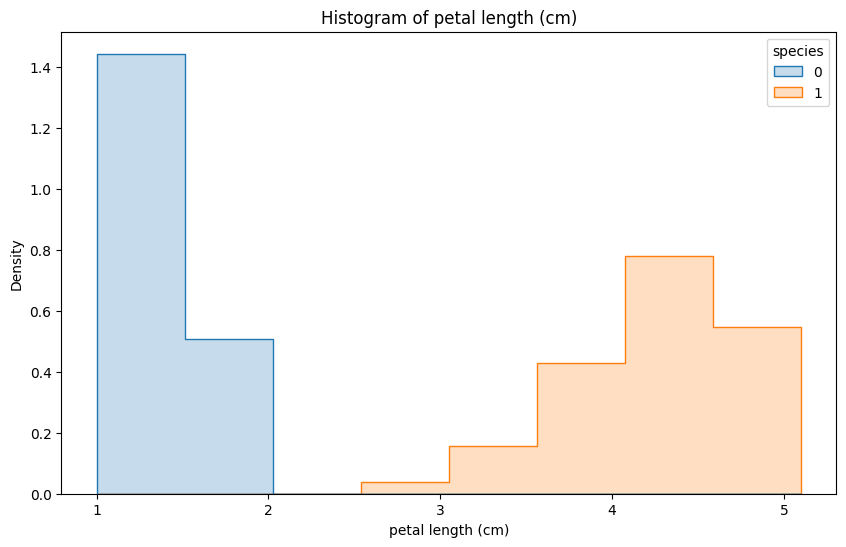

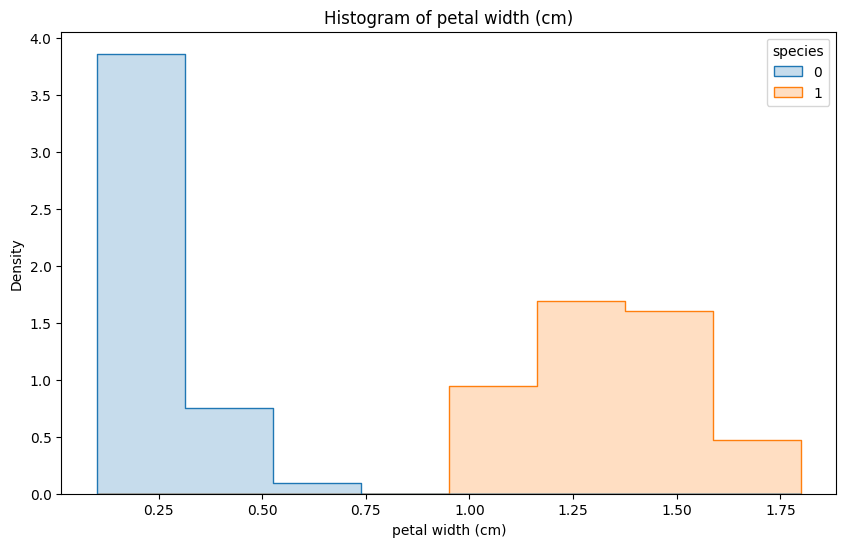

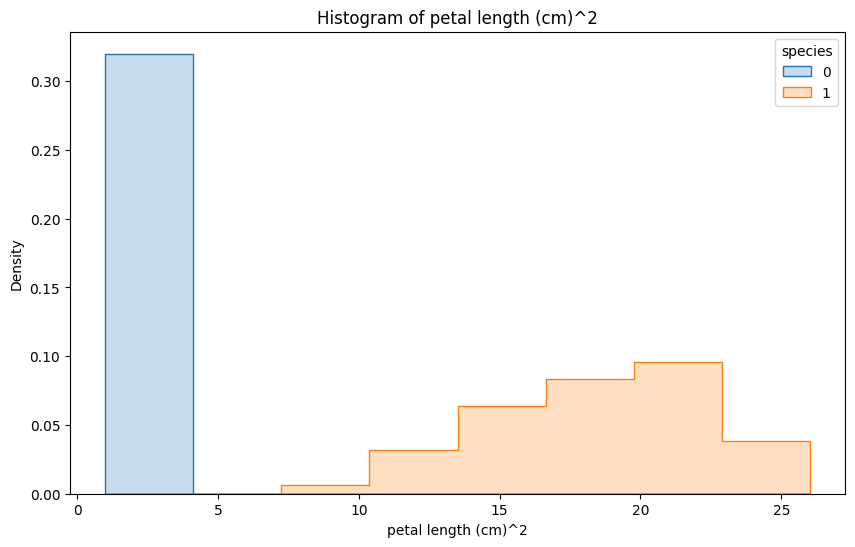

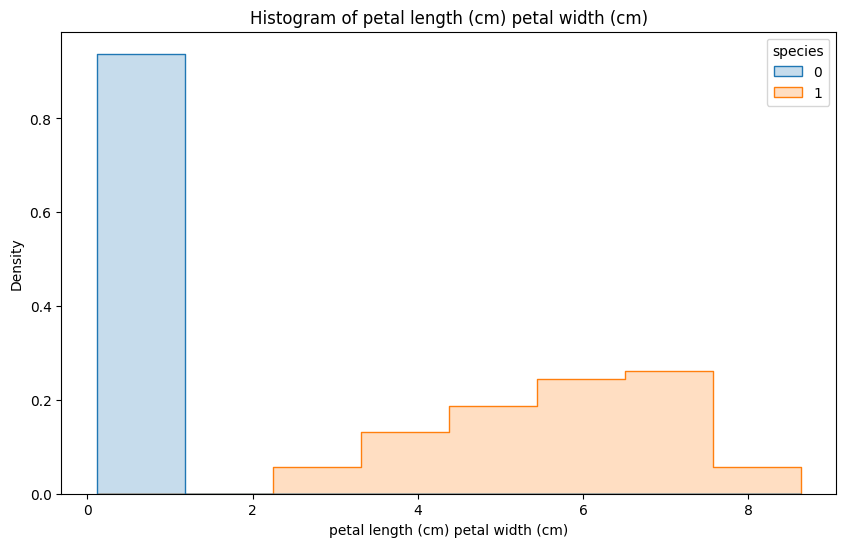

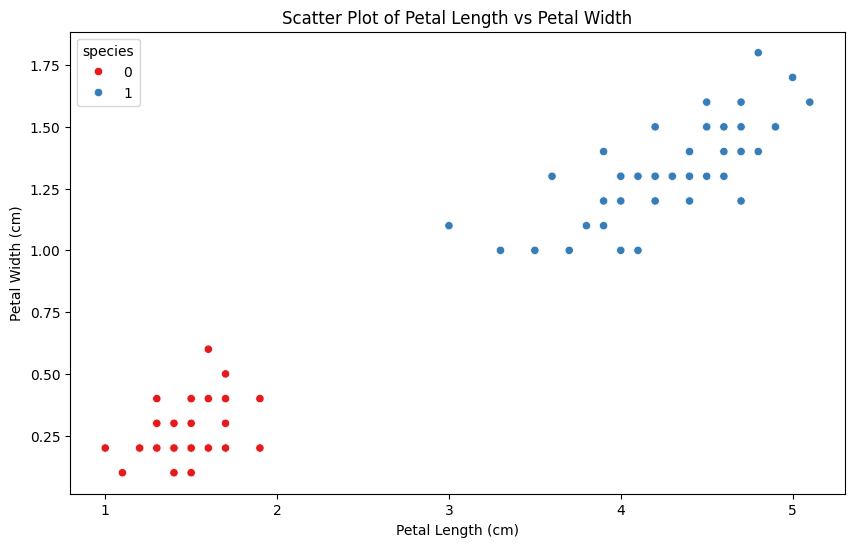

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select top features for visualization
top_features = [
    'petal length (cm)',
    'petal width (cm)',
    'petal length (cm)^2',
    'petal length (cm) petal width (cm)'
]

# Plot histograms for the top features
for feature in top_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df_poly, x=feature, hue='species', element='step', stat='density', common_norm=False)
    plt.title(f'Histogram of {feature}')
    plt.show()

# Scatter plot for interaction terms
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_poly, x='petal length (cm)', y='petal width (cm)', hue='species', palette='Set1')
plt.title('Scatter Plot of Petal Length vs Petal Width')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.show()

1.1. Build a Classification Model

First, we’ll build the logistic regression model using the original features, and then we’ll do the same using the polynomial features.

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_binary[iris.feature_names], df_binary['species'], test_size=0.3, random_state=42)

# Initialize and train the logistic regression model on original features
model_original = LogisticRegression()
model_original.fit(X_train, y_train)

# Predict on the test set
y_pred_original = model_original.predict(X_test)

# Evaluate the model
print("Original Features:")
print("Accuracy:", accuracy_score(y_test, y_pred_original))
print("Precision:", precision_score(y_test, y_pred_original, pos_label=0))
print("Recall:", recall_score(y_test, y_pred_original, pos_label=0))
print("F1 Score:", f1_score(y_test, y_pred_original, pos_label=0))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_original))

# Now let's train the model on the polynomial features
X_poly_train, X_poly_test, y_poly_train, y_poly_test = train_test_split(df_poly.drop('species', axis=1), df_poly['species'], test_size=0.3, random_state=42)

model_poly = LogisticRegression(max_iter=1000)
model_poly.fit(X_poly_train, y_poly_train)

# Predict on the test set
y_pred_poly = model_poly.predict(X_poly_test)

# Evaluate the model
print("\nPolynomial Features:")
print("Accuracy:", accuracy_score(y_poly_test, y_pred_poly))
print("Precision:", precision_score(y_poly_test, y_pred_poly, pos_label=0))
print("Recall:", recall_score(y_poly_test, y_pred_poly, pos_label=0))
print("F1 Score:", f1_score(y_poly_test, y_pred_poly, pos_label=0))
print("ROC-AUC:", roc_auc_score(y_poly_test, y_pred_poly))

Original Features:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC-AUC: 1.0

Polynomial Features:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC-AUC: 1.0


	•	probability=True: This parameter in the SVC model allows the model to output probability estimates by using a cross-validation procedure within the training process. The predict_proba method then provides these probabilities.
	•	predict_proba Method: This method returns the probability estimates for each class, which sum to 1.0. This is what roc_auc_score expects for multiclass evaluation.

In [13]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score

# Use all three classes for classification
X_full_train, X_full_test, y_full_train, y_full_test = train_test_split(df[iris.feature_names], df['species'], test_size=0.3, random_state=42)

# Train an SVM with probability estimates
model_svm = SVC(kernel='rbf', probability=True)
model_svm.fit(X_full_train, y_full_train)

# Predict on the test set
y_pred_svm = model_svm.predict(X_full_test)

# Predict probabilities on the test set
y_proba_svm = model_svm.predict_proba(X_full_test)

# Evaluate the SVM model
print("SVM Model (RBF Kernel):")
print("Accuracy:", accuracy_score(y_full_test, y_pred_svm))
print("Precision:", precision_score(y_full_test, y_pred_svm, average='macro'))
print("Recall:", recall_score(y_full_test, y_pred_svm, average='macro'))
print("F1 Score:", f1_score(y_full_test, y_pred_svm, average='macro'))
print("ROC-AUC:", roc_auc_score(y_full_test, y_proba_svm, multi_class='ovr'))

SVM Model (RBF Kernel):
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC-AUC: 1.0


Correct Workflow Example

Here’s how the workflow should be:

	1.	Fit PolynomialFeatures on the training data.
	2.	Use transform to apply the learned transformation to the test data.

In [20]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split

# Example data (using binary classification: Setosa vs Versicolor)
X = df_binary[iris.feature_names]
y = df_binary['species']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit PolynomialFeatures on training data only
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly_train = poly.fit_transform(X_train)  # Fit and transform training data

# Transform the test data without refitting
X_poly_test = poly.transform(X_test)  # Only transform test data

# Initialize and train a logistic regression model on the polynomial features
model_poly = LogisticRegression(max_iter=1000)
model_poly.fit(X_poly_train, y_train)

# Predict on the test set
y_pred_poly = model_poly.predict(X_poly_test)

# Evaluate the model
print("Polynomial Features:")
print("Accuracy:", accuracy_score(y_test, y_pred_poly))
print("Precision:", precision_score(y_test, y_pred_poly, pos_label=0))
print("Recall:", recall_score(y_test, y_pred_poly, pos_label=0))
print("F1 Score:", f1_score(y_test, y_pred_poly, pos_label=0))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_poly))

Polynomial Features:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC-AUC: 1.0


Seccond Approach: Neural Network

	1.	Model: Let  f(x)  be a neural network that takes the features  x  as input and outputs transformed features  x{\prime} .
	2.	Loss Function: Define the loss function as the negative KL divergence:

\mathcal{L}(\theta) = -D_{KL}(P{\prime}(x{\prime}; \theta) || Q{\prime}(x{\prime}; \theta))

	3.	Optimization: Use gradient descent-based optimization to minimize this loss function, effectively maximizing the KL divergence.

In [22]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# One-hot encode the labels
encoder = OneHotEncoder(sparse_output=False)
y_onehot = encoder.fit_transform(y.reshape(-1, 1))

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Define the neural network model with log-softmax for KL Divergence
class NeuralNetWithKL(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, num_classes):
        super(NeuralNetWithKL, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size2, num_classes)
        self.log_softmax = nn.LogSoftmax(dim=1)  # Use log-softmax for KLDivLoss

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        out = self.log_softmax(out)  # Log-Softmax as the final activation
        return out

# Set parameters for the model
input_size = X_train.shape[1]
hidden_size1 = 16
hidden_size2 = 8
num_classes = 3  # 3 classes in the Iris dataset

# Initialize the model
model = NeuralNetWithKL(input_size, hidden_size1, hidden_size2, num_classes)

# Loss and optimizer
criterion = nn.KLDivLoss(reduction='batchmean')  # KL divergence loss
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
num_epochs = 100

for epoch in range(num_epochs):
    model.train()  # Set the model to training mode

    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)  # KL divergence expects log-probs and probs

    # Backward pass and optimization
    optimizer.zero_grad()  # Clear gradients
    loss.backward()        # Compute gradients
    optimizer.step()       # Update model weights

    # Print the loss every 10 epochs
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model on test data
model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    _, predicted = torch.max(test_outputs, 1)
    _, actual = torch.max(y_test_tensor, 1)

    accuracy = (predicted == actual).sum().item() / len(actual)
    print(f'Accuracy on test set: {accuracy * 100:.2f}%')

Epoch [10/100], Loss: 0.6977
Epoch [20/100], Loss: 0.4833
Epoch [30/100], Loss: 0.3168
Epoch [40/100], Loss: 0.1776
Epoch [50/100], Loss: 0.0992
Epoch [60/100], Loss: 0.0696
Epoch [70/100], Loss: 0.0585
Epoch [80/100], Loss: 0.0531
Epoch [90/100], Loss: 0.0501
Epoch [100/100], Loss: 0.0481
Accuracy on test set: 100.00%


VAE with KL divergence

In [36]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)

# Define the latent feature generator
class LatentFeatureGenerator(nn.Module):
    def __init__(self, input_size, hidden_size, latent_size):
        super(LatentFeatureGenerator, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.dropout = nn.Dropout(0.3)  # Add dropout to regularize
        self.fc_mu = nn.Linear(hidden_size, latent_size)     # Mean of latent space
        self.fc_logvar = nn.Linear(hidden_size, latent_size) # Log variance of latent space

    def forward(self, x):
        h1 = torch.relu(self.fc1(x))
        mu = self.fc_mu(h1)
        logvar = self.fc_logvar(h1)
        return mu, logvar

# Define the KL divergence loss function
# Instead of averaging before computing KL divergence, compute the KL divergence for each pair of samples and sum the result:
def kl_divergence(mu1, logvar1, mu2, logvar2):
    var1 = logvar1.exp()
    var2 = logvar2.exp()
    kl_div = 0.5 * torch.sum(var1 / var2 + ((mu2 - mu1).pow(2) / var2) - 1 + logvar2 - logvar1, dim=1)
    return kl_div.mean()  # Average KL divergence across samples


# Instantiate the model
input_size = X_train.shape[1]
hidden_size = 16
latent_size = 3  # You can modify this value to change the latent feature space size

model = LatentFeatureGenerator(input_size, hidden_size, latent_size)

# Define the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Training loop to maximize KL divergence between class distributions
num_epochs = 20000
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()

    # Split data into class 1 and class 2 (Setosa and Versicolor for example)
    class1_mask = (y_train == 0)  # Select Setosa
    class2_mask = (y_train == 1)  # Select Versicolor
    
    mu_class1, logvar_class1 = model(X_train_tensor[class1_mask])
    mu_class2, logvar_class2 = model(X_train_tensor[class2_mask])
    # Downsample the larger class to match the smaller class
    class_size = min(mu_class1.size(0), mu_class2.size(0))
    mu_class1, logvar_class1 = mu_class1[:class_size], logvar_class1[:class_size]
    mu_class2, logvar_class2 = mu_class2[:class_size], logvar_class2[:class_size]

    # increase divergence
    kl_loss = 1/kl_divergence(mu_class1, logvar_class1, mu_class2, logvar_class2)
    
    # Backward pass and optimization
    kl_loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], KL Loss: {kl_loss.item():.4f}')

# Extract new latent features from the model after training
with torch.no_grad():
    mu_train, _ = model(X_train_tensor)
    mu_test, _ = model(X_test_tensor)
    
    print(f"Latent Features Shape (train): {mu_train.shape}")
    print(f"Latent Features Shape (test): {mu_test.shape}")

Epoch [100/20000], KL Loss: 1.1310
Epoch [200/20000], KL Loss: 0.8332
Epoch [300/20000], KL Loss: 0.6496
Epoch [400/20000], KL Loss: 0.5261
Epoch [500/20000], KL Loss: 0.4376
Epoch [600/20000], KL Loss: 0.3713
Epoch [700/20000], KL Loss: 0.3200
Epoch [800/20000], KL Loss: 0.2791
Epoch [900/20000], KL Loss: 0.2458
Epoch [1000/20000], KL Loss: 0.2182
Epoch [1100/20000], KL Loss: 0.1950
Epoch [1200/20000], KL Loss: 0.1753
Epoch [1300/20000], KL Loss: 0.1583
Epoch [1400/20000], KL Loss: 0.1436
Epoch [1500/20000], KL Loss: 0.1307
Epoch [1600/20000], KL Loss: 0.1193
Epoch [1700/20000], KL Loss: 0.1093
Epoch [1800/20000], KL Loss: 0.1003
Epoch [1900/20000], KL Loss: 0.0922
Epoch [2000/20000], KL Loss: 0.0849
Epoch [2100/20000], KL Loss: 0.0784
Epoch [2200/20000], KL Loss: 0.0723
Epoch [2300/20000], KL Loss: 0.0668
Epoch [2400/20000], KL Loss: 0.0618
Epoch [2500/20000], KL Loss: 0.0572
Epoch [2600/20000], KL Loss: 0.0529
Epoch [2700/20000], KL Loss: 0.0490
Epoch [2800/20000], KL Loss: 0.0455
E

Step-by-Step Evaluation of KL Divergence:

	1.	Extract the latent features for each class from the training set.
	2.	Estimate distributions (e.g., assuming normal distributions) for the latent features of each class.
	3.	Calculate KL divergence between these distributions for each dimension of the latent space.


In [37]:
import numpy as np
from scipy.stats import norm

# Separate latent features for class 0 (Setosa) and class 1 (Versicolor)
latent_class1 = mu_train[y_train == 0].numpy()  # Setosa
latent_class2 = mu_train[y_train == 1].numpy()  # Versicolor

# Function to calculate KL divergence between two normal distributions
def kl_divergence_gaussian(mu1, sigma1, mu2, sigma2):
    return np.log(sigma2 / sigma1) + (sigma1**2 + (mu1 - mu2)**2) / (2 * sigma2**2) - 0.5

# Calculate KL divergence for each dimension in the latent space
kl_values = []
for i in range(latent_class1.shape[1]):
    # Estimate mean and variance for both classes in the i-th dimension
    mu1, sigma1 = latent_class1[:, i].mean(), latent_class1[:, i].std()
    mu2, sigma2 = latent_class2[:, i].mean(), latent_class2[:, i].std()
    
    # Calculate KL divergence for the i-th dimension
    kl_div = kl_divergence_gaussian(mu1, sigma1, mu2, sigma2)
    kl_values.append(kl_div)
    print(f'Dimension {i+1}: KL Divergence = {kl_div:.4f}')

# Sum the KL divergences across dimensions for the total divergence
total_kl_divergence = np.sum(kl_values)
print(f'Total KL Divergence: {total_kl_divergence:.4f}')

Dimension 1: KL Divergence = 7.4909
Dimension 2: KL Divergence = 12.3664
Dimension 3: KL Divergence = 18.8241
Total KL Divergence: 38.6815


Let’s plot histograms of the latent features (generated by the model) to visualize their distribution across the two classes.

Here’s the code to plot histograms for each dimension of the latent space, showing the distribution of latent features for Class 0 (Setosa) and Class 1 (Versicolor):

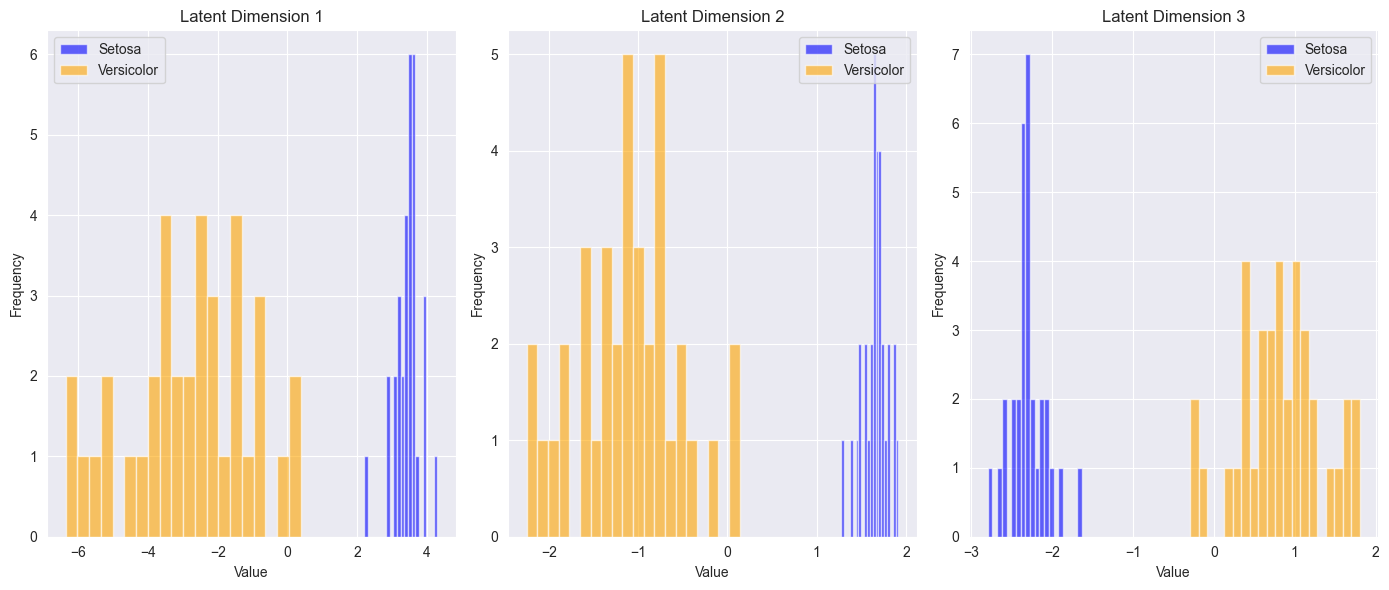

In [38]:
import matplotlib.pyplot as plt

# Separate latent features for each class
latent_class1 = mu_train[y_train == 0].numpy()  # Setosa
latent_class2 = mu_train[y_train == 1].numpy()  # Versicolor

# Plot histograms for each latent dimension
num_dimensions = latent_class1.shape[1]

plt.figure(figsize=(14, 6))
for i in range(num_dimensions):
    plt.subplot(1, num_dimensions, i + 1)
    plt.hist(latent_class1[:, i], bins=20, alpha=0.6, label='Setosa', color='blue')
    plt.hist(latent_class2[:, i], bins=20, alpha=0.6, label='Versicolor', color='orange')
    plt.title(f'Latent Dimension {i + 1}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()

Let’s proceed by applying two models to the newly generated latent features to evaluate their classification performance. I will use Logistic Regression and Random Forests for this task.

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Train Logistic Regression on latent features
log_reg = LogisticRegression()
log_reg.fit(mu_train.numpy(), y_train)

# Predict and evaluate on test set
y_pred_log_reg = log_reg.predict(mu_test.numpy())
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f"Logistic Regression Accuracy: {accuracy_log_reg * 100:.2f}%")

Logistic Regression Accuracy: 93.33%


In [40]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest on latent features
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(mu_train.numpy(), y_train)

# Predict and evaluate on test set
y_pred_rf = rf_model.predict(mu_test.numpy())
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf * 100:.2f}%")

Random Forest Accuracy: 93.33%
